<a href="https://colab.research.google.com/github/AkashArya96/GAN_Fashion/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip list

In [2]:
# Bringing in tensorflow datasets for fashion mnist
import tensorflow_datasets as tfds
# Bringing matplotlib for viz stuff
from matplotlib import pyplot as plt

In [3]:
# use the tensorflow datasets api to bring in the data 
ds = tfds.load('fashion_mnist',split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteLRLRTI/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteLRLRTI/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
ds.as_numpy_iterator().next()['label']

2

In [5]:
# Do some data transformation
import numpy as np


In [6]:
# Set up connection as a iterator
dataiterator = ds.as_numpy_iterator()

In [ ]:
dataiterator.next()['image']

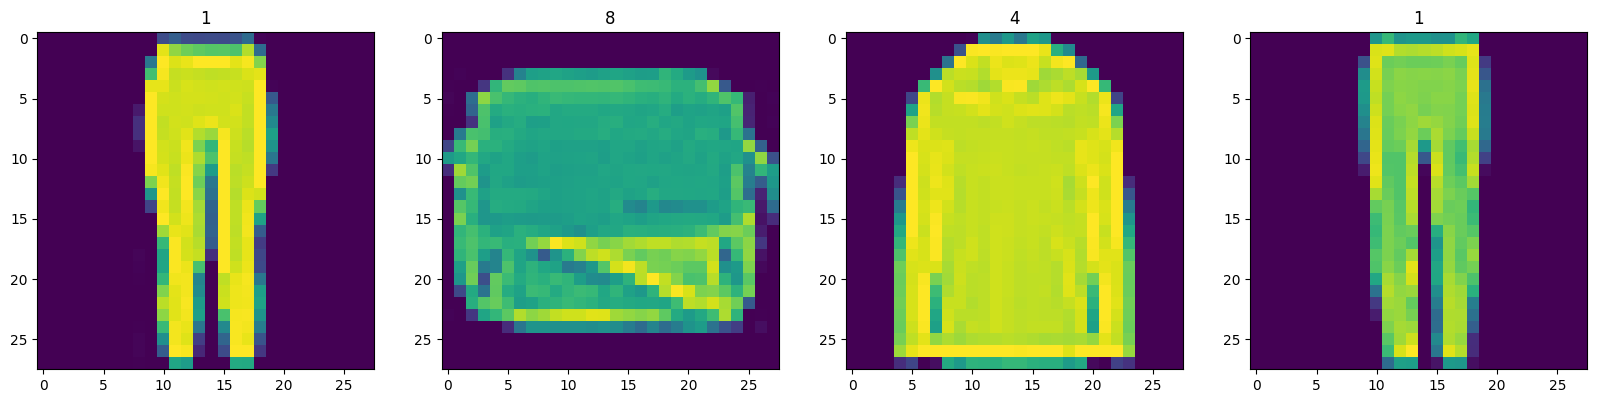

In [8]:

fig, ax = plt.subplots(ncols=4, figsize = (20,20))
# Loop four time and get images
for idx in range(4):
  sample = dataiterator.next()
  # plot the image using a specific subplot
  ax[idx].imshow(np.squeeze(sample['image']))
  # Appending the image label as the plot title
  ax[idx].title.set_text(sample['label'])


In [9]:
# Scale and return images only
def scale_images(data):
  image = data['image']
  return image/255

In [10]:
# Reload the Dataset
ds =tfds.load('fashion_mnist',split='train')
# Running the dataset through the scale_images preprocesssing step
ds =ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds =ds.prefetch(64)


In [11]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

Build Neural Network

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [13]:
# build Generator
def build_generator():
  model = Sequential()
# Takes random value and then reshape it to 7*7*128
# Begining of generated images
  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  # Upsampling block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5 , padding ='same'))
  model.add(LeakyReLU(0.2))

  # Upsampling block 2
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5 , padding ='same'))
  model.add(LeakyReLU(0.2))

  # Convolution Block 1
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  
  # Convolution Block 2
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  # conv layer to get to one channel
  model.add(Conv2D(1, 4,padding='same',activation='sigmoid'))

  return model

In [14]:
generator = build_generator()


In [15]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [24]:
img = generator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 51ms/step


In [25]:
img.shape

(4, 28, 28, 1)

1/1 [==============================] - 0s 29ms/step


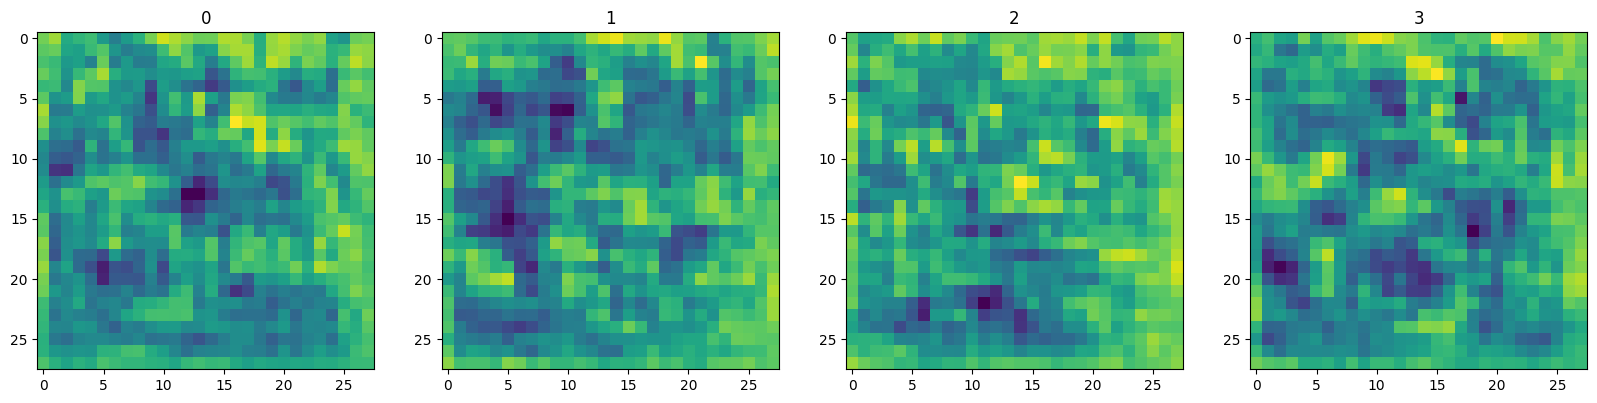

In [18]:
img = generator.predict(np.random.randn(4,128,1))
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
# Loop four time and get images
for idx, img in enumerate(img):
  # sample = dataiterator.next()
  # plot the image using a specific subplot
  ax[idx].imshow(np.squeeze(img))
  # Appending the image label as the plot title
  ax[idx].title.set_text(idx)

In [19]:
# Buid Discriminator
def build_descriminator():
  model = Sequential()

# first conv block
  model.add(Conv2D(32, 5, input_shape=(28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

# second conv block
  model.add(Conv2D(64, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

# third conv block
  model.add(Conv2D(128, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

# fourth conv block
  model.add(Conv2D(256, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
# flatten then pass to dense layer

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))

  return model

In [20]:
discriminator =  build_descriminator()

In [21]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [26]:
img.shape

(4, 28, 28, 1)

In [27]:
discriminator.predict(img)

1/1 [==============================] - 0s 231ms/step


array([[0.49807766],
       [0.49788278],
       [0.49810445],
       [0.4980853 ]], dtype=float32)

Construct Training Loop

In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [29]:
g_opt =Adam(learning_rate=0.00001)
d_opt =Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()


In [30]:
from tensorflow.keras.models import Model


In [31]:
import tensorflow as tf

In [ ]:
tf.random.normal((6,128,1))

In [33]:
class FashionGAN(Model): 
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 

    def train_step(self, batch):
        # Get the data 
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)
        
        # Train the discriminator
        with tf.GradientTape() as d_tape: 
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True) 
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate loss - BINARYCROSS 
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # Apply backpropagation - nn learn 
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) 
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Train the generator 
        with tf.GradientTape() as g_tape: 
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)
                                        
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
                                        
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) 
            
        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [34]:
fashgan = FashionGAN(generator, discriminator)

In [35]:
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

In [36]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [37]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('/content/sample_data/Images', f'generated_img_{epoch}_{i}.png'))

In [38]:
# Recommend 2000 epochs
hist = fashgan.fit(ds, epochs=20, callbacks=[ModelMonitor()])

Epoch 1/20
  6/469 [..............................] - ETA: 1:21 - d_loss: 0.6940 - g_loss: 0.6874

469/469 [==============================] - 95s 181ms/step - d_loss: 0.6467 - g_loss: 0.7322
Epoch 2/20
469/469 [==============================] - 84s 178ms/step - d_loss: 0.6389 - g_loss: 0.7824
Epoch 3/20
469/469 [==============================] - 84s 179ms/step - d_loss: 0.6782 - g_loss: 0.7665
Epoch 4/20
469/469 [==============================] - 84s 179ms/step - d_loss: 0.6755 - g_loss: 0.7643
Epoch 5/20
469/469 [==============================] - 84s 178ms/step - d_loss: 0.6784 - g_loss: 0.7027
Epoch 6/20
469/469 [==============================] - 84s 180ms/step - d_loss: 0.6558 - g_loss: 0.8799
Epoch 7/20
469/469 [==============================] - 84s 179ms/step - d_loss: 0.6613 - g_loss: 0.7766
Epoch 8/20
469/469 [==============================] - 84s 179ms/step - d_loss: 0.6579 - g_loss: 0.8811
Epoch 9/20
469/469 [==============================] - 84s 179ms/step - d_loss: 0.6309 - g_loss: 0.9270
Epoch 10/20
469/469 [==============================] - 84s 179ms/step - d_loss: 0.63

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()


In [42]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))

1/1 [==============================] - 0s 336ms/step


In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4): 
    for c in range(4): 
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])